<a href="https://colab.research.google.com/github/AudreyMuller/Recommandation_Films_1980_s/blob/Audrey/Audrey_MULLER_Matplolib_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

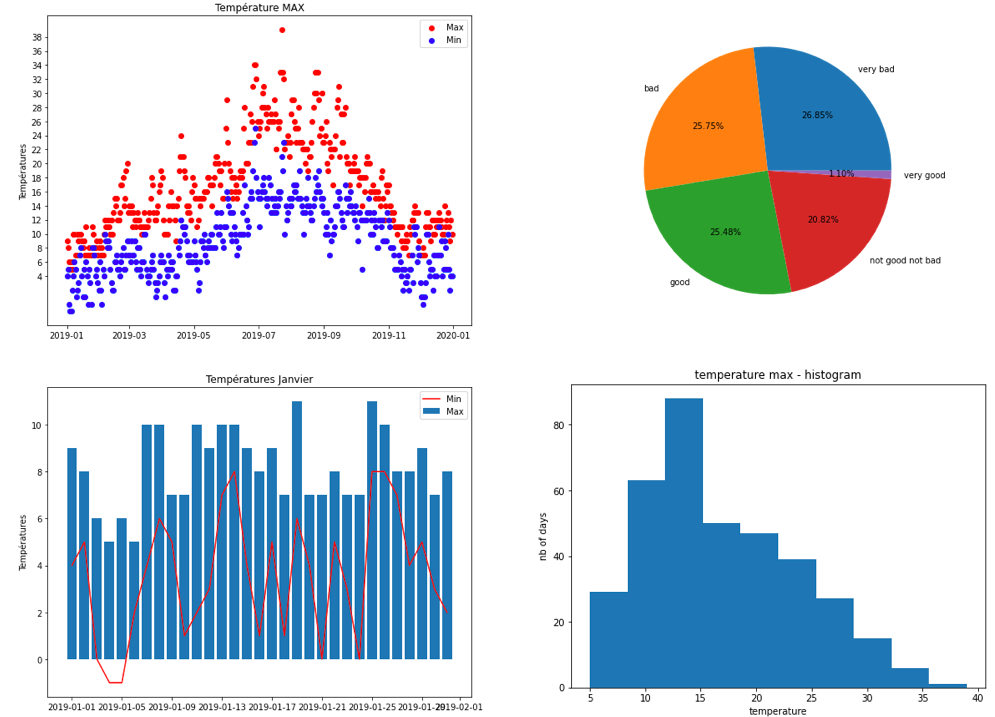

In [ ]:
# Complete the code below :
df_opinion = df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?
print(df_opinion.head().to_markdown())

|                  |   OPINION |
|:-----------------|----------:|
| very bad         |        98 |
| bad              |        94 |
| good             |        93 |
| not good not bad |        76 |
| very good        |         4 |


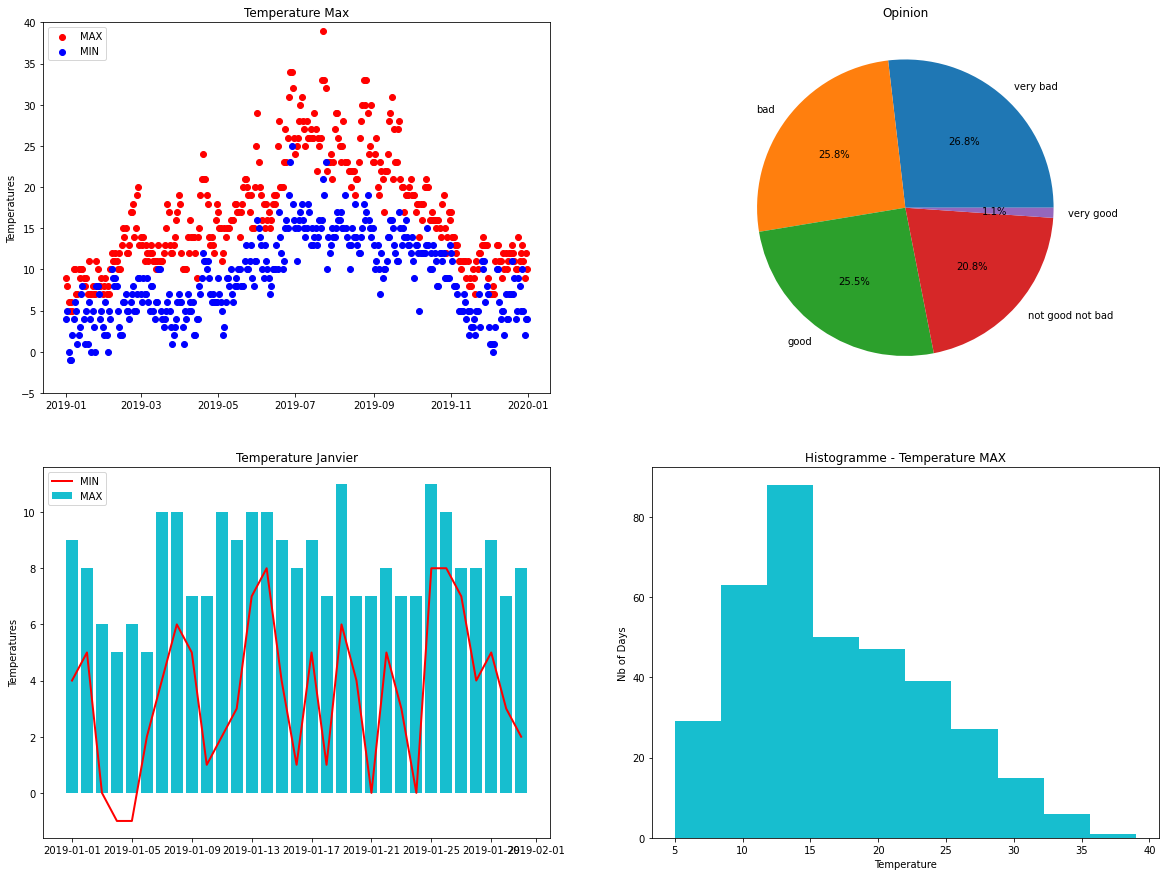

In [ ]:


# Complete the code below :
fig, ax = plt.subplots(2,2,figsize = (20,15))

#1er graphique - Scatter plot
ax1=plt.subplot(221)
ax1.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
ax1.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue')
ax1.set_title('Temperature Max')
ax1.set_ylim(-5,40)
ax1.set_ylabel('Temperatures')
ax1.legend(['MAX', 'MIN'], loc='upper left')


#2ème graphique - Pie plot
ax2=plt.subplot(222)
ax2.pie(df_opinion,labels=df_opinion.index,autopct='%1.1f%%')
ax2.set_title('Opinion')


#3ème graphique - Histogram and line
ax3=plt.subplot(223)
ax3.bar(x = df_weather[df_weather["DATE"].dt.month==1]['DATE'], height = df_weather[df_weather["DATE"].dt.month==1]["MAX_TEMPERATURE_C"],color= 'C9')
ax3.plot( df_weather[df_weather["DATE"].dt.month==1]['DATE'], df_weather[df_weather["DATE"].dt.month==1]["MIN_TEMPERATURE_C"],color= 'red',linewidth=2)
ax3.set_title('Temperature Janvier')
ax3.set_ylabel('Temperatures')
ax3.legend(['MIN', 'MAX'], loc='upper left')

#4ème graphique  - Histogram
ax4=plt.subplot(224)
ax4.hist (df_weather["MAX_TEMPERATURE_C"],color= 'C9')
ax4.set_title('Histogramme - Temperature MAX')
ax4.set_ylabel('Nb of Days')
ax4.set_xlabel('Temperature')


plt.show()

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

Text(0.5, 0, 'Min')

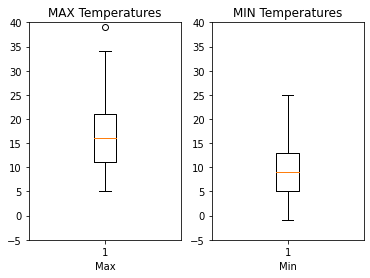

In [ ]:
# Your code here :
fig, ax = plt.subplots(1,2)

#1er graphique - Scatter plot
ax1=plt.subplot(121)
ax1.boxplot(df_weather["MAX_TEMPERATURE_C"])
ax1.set_ylim(-5,40)
ax1.set_title('MAX Temperatures')
ax1.set_xlabel("Max")

#2ème graphique - Pie plot
ax2=plt.subplot(122)
ax2.boxplot(df_weather["MIN_TEMPERATURE_C"])
ax2.set_ylim(-5,40)
ax2.set_title('MIN Temperatures')
ax2.set_xlabel("Min")


## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

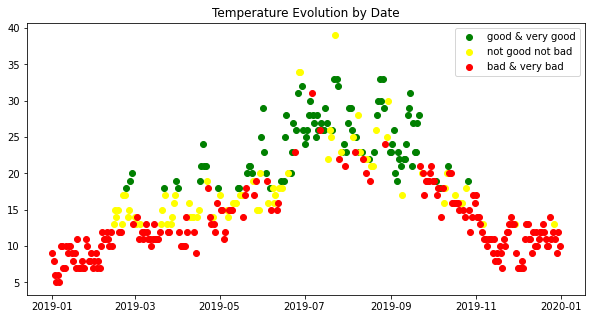

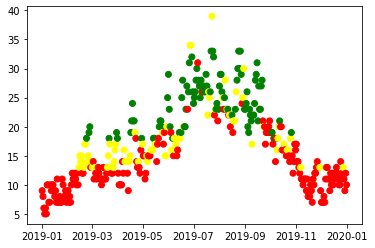

In [ ]:
# It's your turn now :
colors2 = {'very good':'green', 'good':'green', 'not good not bad':'yellow', 'bad':'red','very bad':'red'}

fig, ax = plt.subplots()

ax.scatter(df_weather["DATE"], df_weather["MAX_TEMPERATURE_C"],c=df_weather['OPINION'].map(colors2))
plt.show()



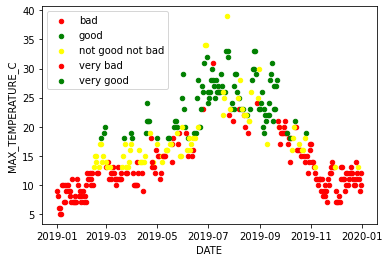

In [ ]:
fig, ax = plt.subplots()

colors2 = {'very good':'green', 'good':'green', 'not good not bad':'yellow', 'bad':'red','very bad':'red'}

grouped = df_weather.groupby('OPINION')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="DATE", y="MAX_TEMPERATURE_C", label=key, color=colors2[key])

plt.show()

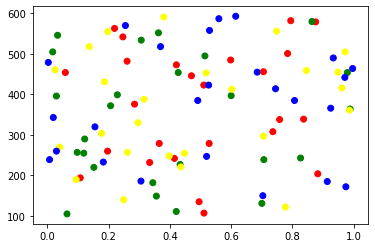

In [ ]:
#source pour trouver la façon de faire
#https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

population = np.random.rand(100)
Area = np.random.randint(100,600,100)
continent =['North America','Europe', 'Asia', 'Australia']*25

df = pd.DataFrame(dict(population=population, Area=Area, continent = continent))

fig, ax = plt.subplots()

colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}


ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))

plt.show()

In [ ]:
df['continent'].map(colors)

0        red
1      green
2       blue
3     yellow
4        red
       ...  
95    yellow
96       red
97     green
98      blue
99    yellow
Name: continent, Length: 100, dtype: object

In [ ]:
df_weather['OPINION'].map(colors2)

0         red
1         red
2         red
3         red
4         red
        ...  
360    yellow
361       red
362       red
363       red
364       red
Name: OPINION, Length: 365, dtype: object